<a href="https://colab.research.google.com/github/PujanMotiwala/fun_activations/blob/main/examples/comparative_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparative Analysis of Activation Functions

In this notebook, we compare the performance of different activation functions: ReLU, Sigmoid, Tanh, and Leaky ReLU. We will visualize these functions and evaluate their impact on a neural network's performance.

## Introduction

Activation functions play a crucial role in the performance of neural networks. Different activation functions can significantly affect the training process and the final performance of the model. This notebook aims to provide a comparative analysis of several popular activation functions.

Let's start by mounting our github repo here:

In [1]:
# Mounting my github repo
!git clone https://<your_github_personal_token>@github.com/PujanMotiwala/fun_activations.git
%cd fun_activations

/bin/bash: line 1: your_github_personal_token: No such file or directory
/content/fun_activations


In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from activation_functions import relu, sigmoid, tanh, leaky_relu

## Dataset Description

We use a synthetic dataset generated with `make_classification`. It consists of 1000 samples, 20 features, and 2 classes. This dataset provides a controlled environment to evaluate the impact of different activation functions.

In [3]:
# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
X

array([[-0.99910178, -0.66386   ],
       [ 1.24668618,  1.15359685],
       [ 0.96277683,  0.85939747],
       ...,
       [-0.10126746, -1.59017563],
       [ 0.64376105, -0.78053855],
       [ 0.69852984, -1.27940455]])

In [5]:
y

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,

In [6]:
# Standardize the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape, X_test.shape)

(700, 2) (300, 2)


In [7]:
# Sample data
x = np.linspace(-10, 10, 100)

# Define activation functions
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def stable_sigmoid(x):
    pos_mask = (x >= 0)
    neg_mask = (x < 0)
    z = np.zeros_like(x)
    z[pos_mask] = np.exp(-x[pos_mask])
    z[neg_mask] = np.exp(x[neg_mask])
    top = np.ones_like(x)
    top[neg_mask] = z[neg_mask]
    return top / (1 + z)

def tanh(x):
    return np.tanh(x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, x * alpha)

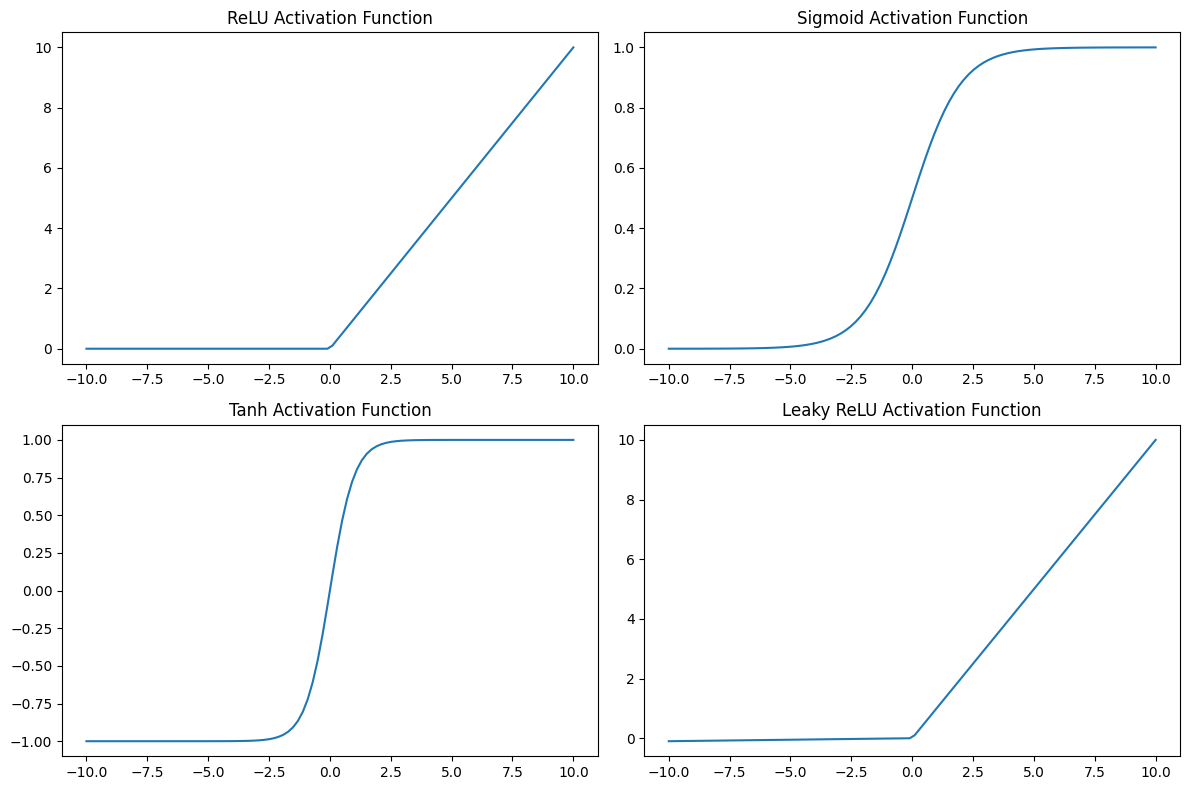

In [8]:
# Plot activation functions
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(x, relu(x))
plt.title('ReLU Activation Function')

plt.subplot(2, 2, 2)
plt.plot(x, sigmoid(x))
plt.title('Sigmoid Activation Function')

plt.subplot(2, 2, 3)
plt.plot(x, tanh(x))
plt.title('Tanh Activation Function')

plt.subplot(2, 2, 4)
plt.plot(x, leaky_relu(x))
plt.title('Leaky ReLU Activation Function')

plt.tight_layout()
plt.show()

## Why Use Sigmoid?

The sigmoid function is often used in the output layer of binary classification problems because it outputs values between 0 and 1, which can be interpreted as probabilities. However, it can suffer from vanishing gradients, making it less suitable for deeper networks compared to ReLU or Leaky ReLU.

## Why Use ReLU?

The ReLU (Rectified Linear Unit) function is widely used in hidden layers of neural networks due to its simplicity and effectiveness. It helps mitigate the vanishing gradient problem, allowing for faster training and better performance in deep networks. However, it can suffer from the "dying ReLU" problem, where neurons can get stuck during training.

## Why Use Tanh?

The tanh function outputs values between -1 and 1, which can be useful for centering data. It is often used in hidden layers and can sometimes perform better than sigmoid for certain types of data. However, like sigmoid, it can also suffer from vanishing gradients in deep networks.

## Why Use Leaky ReLU?

The Leaky ReLU function is a variant of ReLU that allows a small, non-zero gradient when the input is negative. This helps to prevent the "dying ReLU" problem, making it a more robust option for hidden layers in deep networks.

In [9]:
class SimpleNeuralNetwork:
    def __init__(self, input_dim, hidden_dim, output_dim, activation_fn):
        self.weights_input_hidden = np.random.randn(input_dim, hidden_dim)
        self.weights_hidden_output = np.random.randn(hidden_dim, output_dim)
        self.activation_fn = activation_fn

    def forward(self, X):
        self.hidden = self.activation_fn(np.dot(X, self.weights_input_hidden))
        output = stable_sigmoid(np.dot(self.hidden, self.weights_hidden_output))  # Stable sigmoid for output layer
        return output

    def train(self, X, y, epochs=1000, learning_rate=0.01):
        for epoch in range(epochs):
            # Forward pass
            output = self.forward(X)

            # Calculate error
            error = y - output

            # Backward pass (Gradient Descent)
            output_delta = error * output * (1 - output)  # Derivative of sigmoid
            hidden_delta = np.dot(output_delta, self.weights_hidden_output.T) * self.hidden * (1 - self.hidden)

            # Update weights
            self.weights_hidden_output += np.dot(self.hidden.T, output_delta) * learning_rate
            self.weights_input_hidden += np.dot(X.T, hidden_delta) * learning_rate

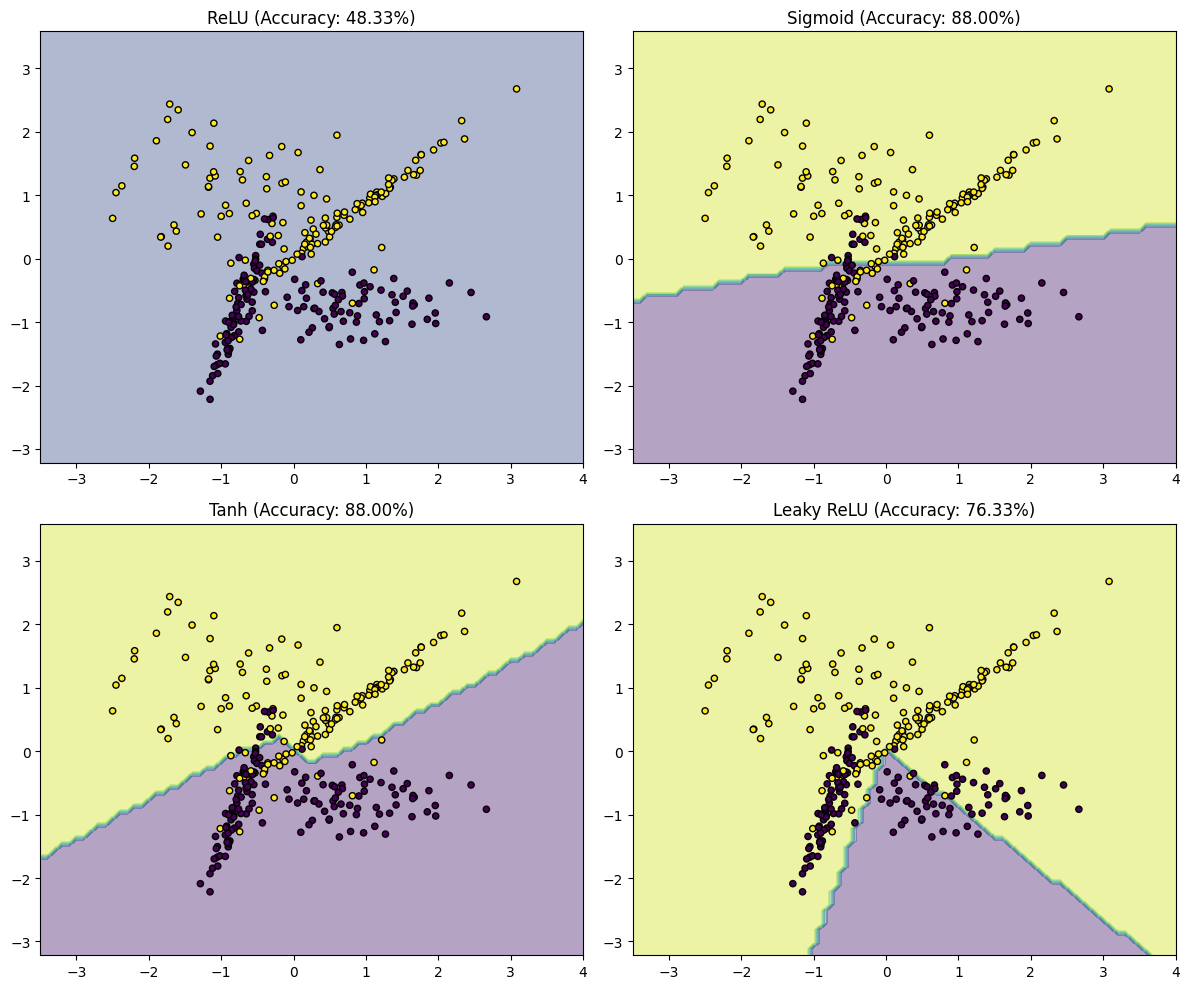

In [10]:
# Define a function to evaluate models with different activation functions
def evaluate_activation_function(activation_fn, X_train, y_train, X_test, y_test):
    nn = SimpleNeuralNetwork(input_dim=2, hidden_dim=10, output_dim=1, activation_fn=activation_fn)
    nn.train(X_train, y_train.reshape(-1, 1), epochs=1000, learning_rate=0.01)

    # Evaluate on test data
    predictions = nn.forward(X_test)
    predictions = (predictions > 0.5).astype(int)  # Threshold for binary classification
    accuracy = accuracy_score(y_test, predictions)
    return accuracy

# Define a function to plot decision boundaries
def plot_decision_boundary(model, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = model.forward(np.c_[xx.ravel(), yy.ravel()])
    Z = (Z > 0.5).astype(int)  # Threshold for binary classification
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    ax.set_title(title)

# Evaluate and plot decision boundaries
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

activations = {
    'ReLU': relu,
    'Sigmoid': sigmoid,
    'Tanh': tanh,
    'Leaky ReLU': leaky_relu
}

results = {}
for ax, (name, fn) in zip(axes.flatten(), activations.items()):
    accuracy = evaluate_activation_function(fn, X_train, y_train, X_test, y_test)
    results[name] = accuracy
    nn = SimpleNeuralNetwork(input_dim=2, hidden_dim=10, output_dim=1, activation_fn=fn)
    nn.train(X_train, y_train.reshape(-1, 1), epochs=1000, learning_rate=0.01)
    plot_decision_boundary(nn, X_test, y_test, ax, f"{name} (Accuracy: {accuracy*100:.2f}%)")

plt.tight_layout()
plt.show()

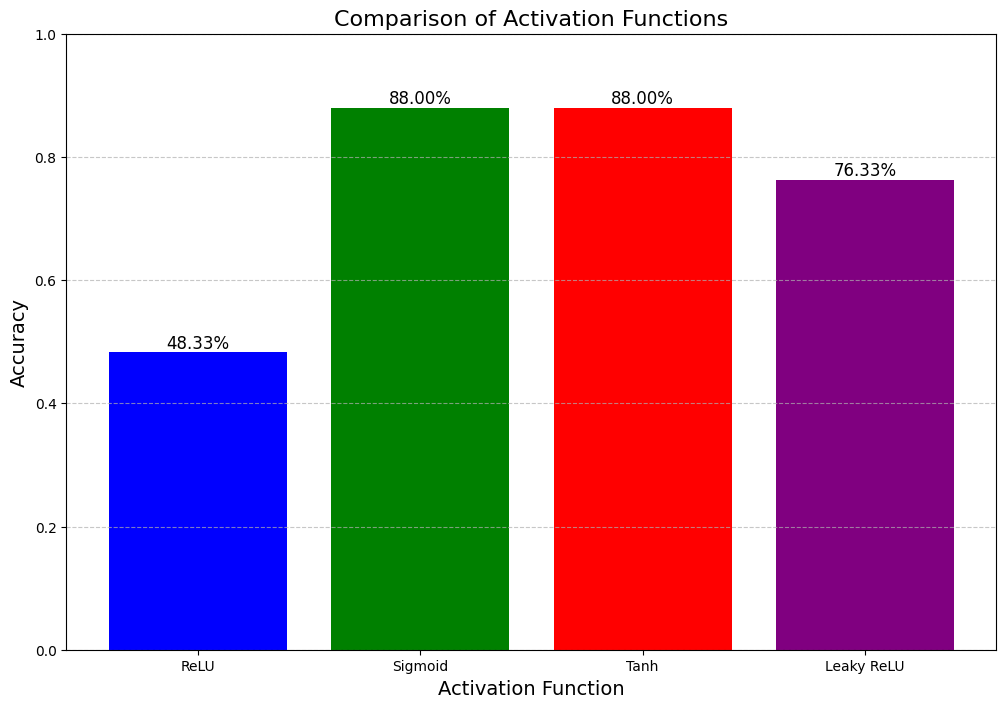

In [11]:
# Plot the results
names = list(results.keys())
values = list(results.values())

plt.figure(figsize=(12, 8))
bars = plt.bar(names, values, color=['blue', 'green', 'red', 'purple'])

# Add titles and labels
plt.title('Comparison of Activation Functions', fontsize=16)
plt.xlabel('Activation Function', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height*100:.2f}%', ha='center', va='bottom', fontsize=12)

plt.show()

## Conclusion

This comparative analysis demonstrates the impact of different activation functions on model performance. We observed the following results:

- **ReLU**: 48.33%
- **Sigmoid**: 88.00%
- **Tanh**: 88.00%
- **Leaky ReLU**: 76.33%

From the results, we can see that the Sigmoid and Tanh activation functions significantly outperform ReLU and Leaky ReLU in this particular setup. This indicates that Sigmoid and Tanh are more effective in this context, likely due to their ability to output values between -1 and 1 or 0 and 1, which helps in binary classification problems.

ReLU, while generally effective in deeper networks and avoiding the vanishing gradient problem, performed poorly in this specific setup. Leaky ReLU performed better than ReLU but still lagged behind Sigmoid and Tanh, which might be due to the simplicity of the network or the nature of the data.

Further exploration can include adding more activation functions, experimenting with different network architectures, and using more complex datasets to see if the trends observed here hold true in other scenarios.